In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [13]:
df=pd.read_csv("C:/Users/91859/Desktop/Stock_price_prediction/GOOGL.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [14]:
df.shape

(4431, 7)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4431 non-null   object 
 1   Open       4431 non-null   float64
 2   High       4431 non-null   float64
 3   Low        4431 non-null   float64
 4   Close      4431 non-null   float64
 5   Adj Close  4431 non-null   float64
 6   Volume     4431 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 242.4+ KB


In [16]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4431.000000,4431.000000,4431.000000,4431.000000,4431.000000,4.431000e+03
mean,693.087345,699.735595,686.078751,693.097367,693.097367,6.444992e+06
std,645.118799,651.331215,638.579488,645.187806,645.187806,7.690351e+06
min,49.644646,50.920921,48.028027,50.055054,50.055054,4.656000e+05
25%,248.558563,250.853355,245.813309,248.415916,248.415916,1.695600e+06
50%,434.924927,437.887878,432.687683,435.330322,435.330322,3.778418e+06
75%,1007.364990,1020.649994,997.274994,1007.790008,1007.790008,8.002390e+06
max,3025.000000,3030.929932,2977.979980,2996.770020,2996.770020,8.215117e+07


In [17]:
nan_count = df.isna().sum()
print(nan_count )

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [10]:
display(df.head().style.hide_index())

AttributeError: 'Styler' object has no attribute 'hide_index'

In [ ]:
df.drop(df.columns.difference(['Date', 'Open', 'Close']), 1, inplace=True)

In [ ]:
display(df.head().style.hide_index())

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
plot1 = sns.scatterplot(data=df.head(100), x="Open", y="Close", ax=ax)
plot1.set(title='Open v/s Close')
plt.show()

In [ ]:
df.hist(bins=50, figsize=(20, 6))
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
X = df['Open'].values
y = df['Close'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3)

In [11]:
model1 = LinearRegression()
build1 = model1.fit(X_train.reshape(-1, 1), y_train)
predict1 = model1.predict(X_test.reshape(-1, 1))

NameError: name 'LinearRegression' is not defined

In [ ]:
print("Co-efficient: ", model1.coef_)
print("\nIntercept: ", model1.intercept_)

Co-efficient:  [0.99999177]

Intercept:  0.02387340994994247


In [ ]:
df1 = pd.DataFrame(list(zip(y_test, predict1)), columns=["Actual Values", "Predicted Values"])

In [ ]:
df1.head().style.hide_index()

Actual Values,Predicted Values
796.950012,798.527313
156.196198,146.053708
542.917908,536.480946
2064.479980,2064.846971
84.434433,87.160294


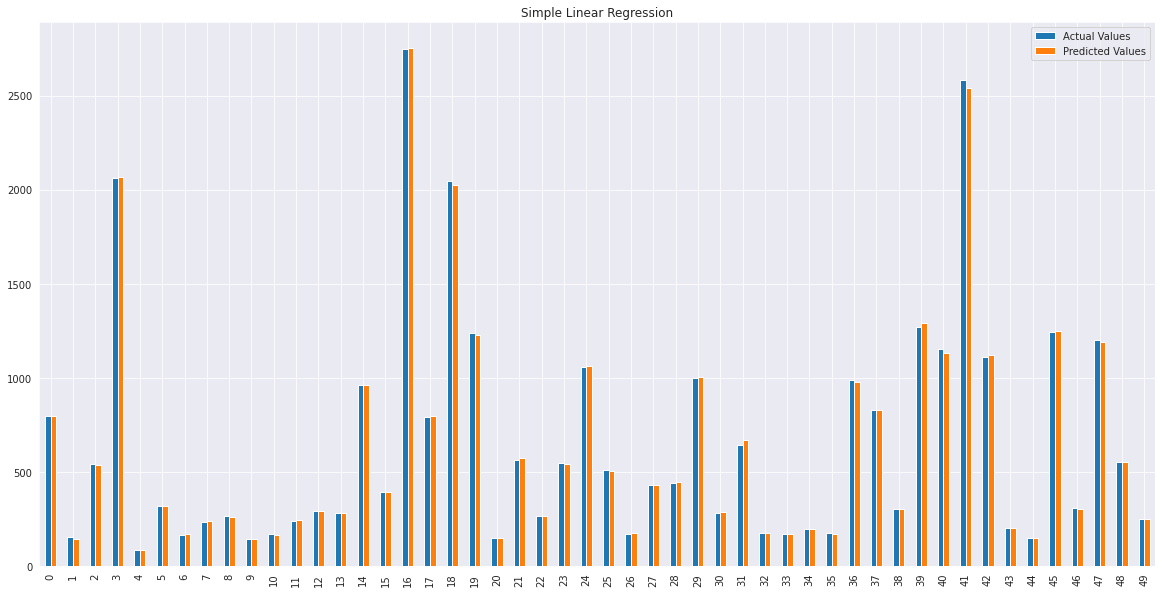

In [ ]:
df1.head(50).plot(kind="bar", figsize=(20, 10), title='Simple Linear Regression')
plt.show()

In [ ]:
accuracy1 = r2_score(y_test, predict1)
print("Accuracy of Simple Linear Regression:", accuracy1)

Accuracy of Simple Linear Regression: 0.9995735664113886


Support vector machine


In [ ]:
model2 = SVR(kernel="rbf", gamma = 0.01, C=100)
build2 = model2.fit(X_train.reshape(-1, 1), y_train)
predict2 = model2.predict(X_test.reshape(-1, 1))

In [ ]:
df2 = pd.DataFrame(list(zip(y_test, predict2)), columns=["Actual Values", "Predicted Values"])

In [ ]:
df2.head().style.hide_index()

Actual Values,Predicted Values
796.950012,802.251093
156.196198,146.030877
542.917908,536.921151
2064.479980,1848.457970
84.434433,87.983041


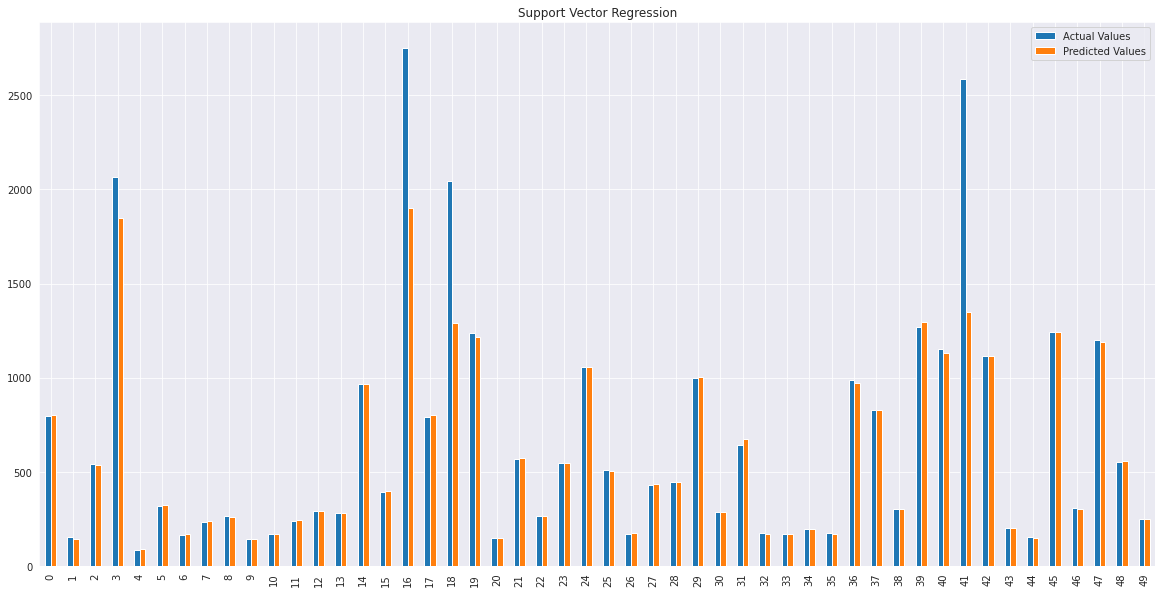

In [ ]:
df2.head(50).plot(kind="bar", figsize=(20, 10), title='Support Vector Regression')
plt.show()

In [ ]:
accuracy2 = r2_score(y_test, predict2)
print("Accuracy of Support Vector Regression:", accuracy2)

Accuracy of Support Vector Regression: 0.8254217399924029


decision tree regression


In [ ]:
model3 = DecisionTreeRegressor()
build3 = model3.fit(X_train.reshape(-1, 1), y_train)
predict3 = model3.predict(X_test.reshape(-1, 1))

In [ ]:
df3 = pd.DataFrame(list(zip(y_test, predict3)), columns=["Actual Values", "Predicted Values"])

In [ ]:
df3.head().style.hide_index()

Actual Values,Predicted Values
796.950012,808.020020
156.196198,149.744751
542.917908,528.080017
2064.479980,2058.879883
84.434433,85.910912


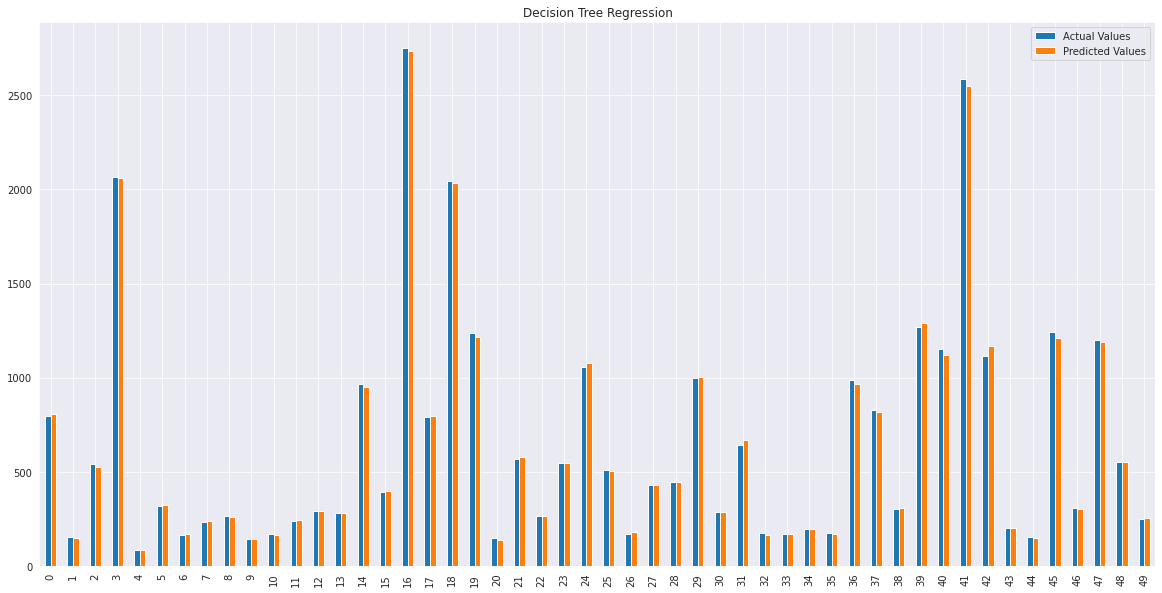

In [ ]:
df3.head(50).plot(kind="bar", figsize=(20, 10), title='Decision Tree Regression')
plt.show()

In [ ]:
accuracy3 = r2_score(y_test, predict3)
print("Accuracy of Decision Tree Regression:", accuracy3)

Accuracy of Decision Tree Regression: 0.9993048273503061


Random Forest Regression

In [ ]:
model4 = RandomForestRegressor(n_estimators=100)
build4 = model4.fit(X_train.reshape(-1, 1), y_train)
predict4 = model4.predict(X_test.reshape(-1, 1))

In [ ]:
df4 = pd.DataFrame(list(zip(y_test, predict4)), columns=["Actual Values", "Predicted Values"])

In [ ]:
df4.head().style.hide_index()

Actual Values,Predicted Values
796.950012,804.322411
156.196198,147.976928
542.917908,533.598223
2064.479980,2066.287398
84.434433,86.586137


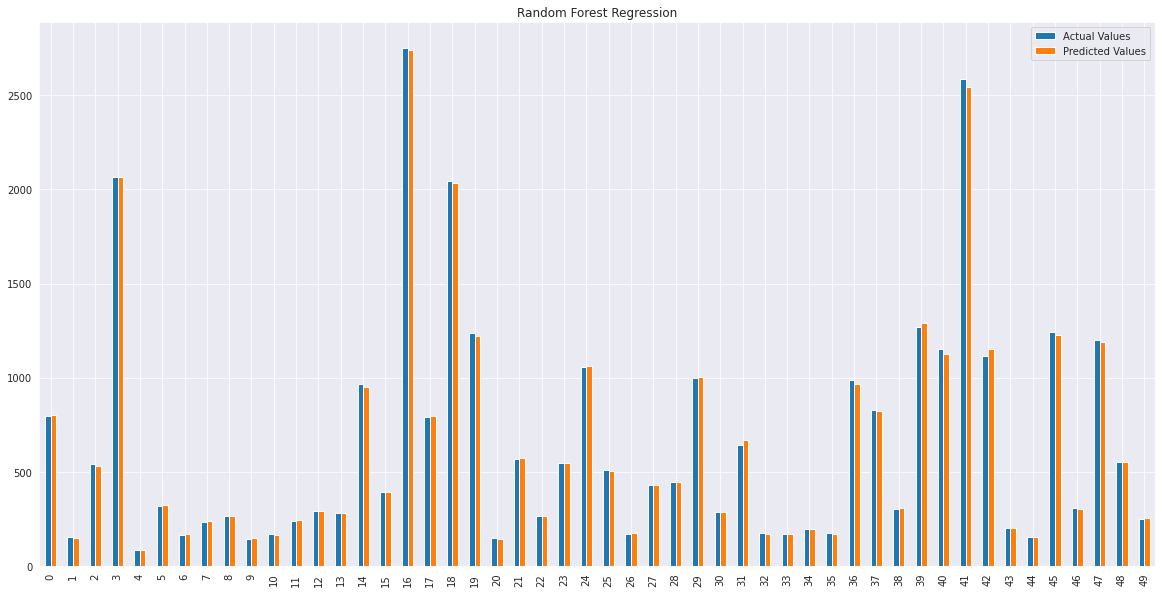

In [ ]:
df4.head(50).plot(kind="bar", figsize=(20, 10), title='Random Forest Regression')
plt.show()

In [ ]:

accuracy4 = r2_score(y_test, predict4)
print("Accuracy of Random Forest Regression:", accuracy4)

Accuracy of Random Forest Regression: 0.9994494411230984


Visualize the result

In [ ]:
dict1 = {
    "Model": ["Simple Linear Regression", "Support Vector Regression", "Decision Tree Regression", "Random Forest Regression"],
    "Accuracy": np.array([accuracy1, accuracy2, accuracy3, accuracy4])
}
df = pd.DataFrame(dict1)
display(df.style.hide_index())

Model,Accuracy
Simple Linear Regression,0.999574
Support Vector Regression,0.825422
Decision Tree Regression,0.999305
Random Forest Regression,0.999449


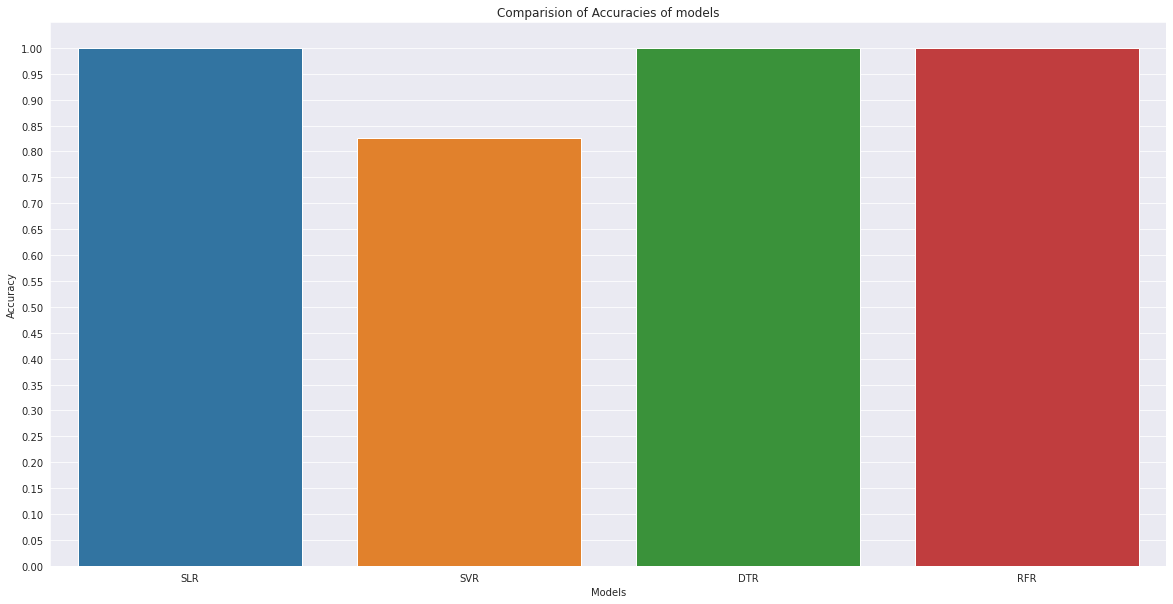

In [ ]:
models = ['SLR', 'SVR', 'DTR', 'RFR']
acc = [accuracy1, accuracy2, accuracy3, accuracy4]
plt.figure(figsize=(20, 10))
plt.title('Comparision of Accuracies of models')
plt.yticks(np.linspace(0,1,21))
plt.ylabel("Accuracy")
plt.xlabel("Models")
values = df.Accuracy
plot = sns.barplot(x=models, y=acc, data=values, errwidth=0)
plt.show()

find the closing price of the complany that day

In [ ]:
new_dict = {
    'Date': np.array(['2023-02-16']),
    'Open':np.array([95.4])}

future_stock_value = pd.DataFrame(new_dict)
display(future_stock_value.style.hide_index())

Date,Open
2023-02-16,95.400000


predict using highest accuracy model

In [ ]:
models = np.array(df['Model'])
accuracy = np.array(df['Accuracy'])

In [ ]:
highest_accuracy=0.0
best_model=""

In [ ]:
for i in range(len(accuracy)) :
    if accuracy[i] >= highest_accuracy :
        highest_accuracy=accuracy[i]
        best_model=models[i]

In [ ]:
slr, svr, dtr, rfr = [], [], [], []

if best_model == models[0] :
    future_stock_value['Predicted'] = model1.predict(future_stock_value.Open.values.reshape(-1, 1))
elif best_model == models[1] :
    future_stock_value['Predicted'] = model2.predict(future_stock_value.Open.values.reshape(-1, 1))
elif best_model == models[2] :
    future_stock_value['Predicted'] = model3.predict(future_stock_value.Open.values.reshape(-1, 1))
elif best_model == models[3] :
    future_stock_value['Predicted'] = model4.predict(future_stock_value.Open.values.reshape(-1, 1))

In [ ]:
display(future_stock_value.style.hide_index())

Date,Open,Predicted
2023-02-16,95.400000,95.423088
